In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [54]:
dump = pd.read_csv(r'/content/alexa_reviews_dataset.tsv',sep='\t')
dump

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [55]:
dump.head(10)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


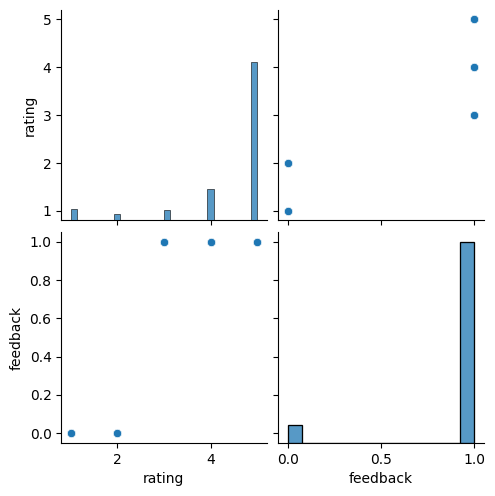

In [56]:
sns.pairplot(dump)
plt.grid(True)
plt.show()

<ipython-input-57-b07e7970db71>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=dump.corr()


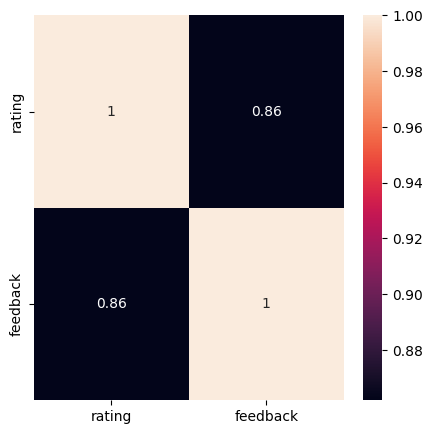

In [57]:
plt.figure(figsize=(5,5))
cor=dump.corr()
sns.heatmap(cor,annot=True)
plt.show()

# Data Preparation

In [58]:
dataset = dump[['verified_reviews','rating']]
dataset.columns = ['Review', 'Sentiment']

dataset.head()

,Review,Sentiment
0,Love my Echo!,5
1,Loved it!,5
2,"Sometimes while playing a game, you can answer...",4
3,I have had a lot of fun with this thing. My 4 ...,5
4,Music,5


In [59]:
# Creating a new column sentiment based on overall ratings
def compute_sentiments(labels):
  sentiments = []
  for label in labels:
    if label > 3.0:
      sentiment = 1
    elif label <= 3.0:
      sentiment = 0
    sentiments.append(sentiment)
  return sentiments

In [60]:
dataset['Sentiment'] = compute_sentiments(dataset.Sentiment)

<ipython-input-60-5813591a96cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Sentiment'] = compute_sentiments(dataset.Sentiment)


In [61]:
dataset.head(10)

,Review,Sentiment
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
5,I received the echo as a gift. I needed anothe...,1
6,"Without having a cellphone, I cannot use many ...",0
7,I think this is the 5th one I've purchased. I'...,1
8,looks great,1
9,Love it! I’ve listened to songs I haven’t hear...,1


In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     3150 non-null   object
 1   Sentiment  3150 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 49.3+ KB


In [63]:
dataset.describe(include='all')

,Review,Sentiment
count,3150,3150.000000
unique,2301,NaN
top,,NaN
freq,79,NaN
mean,NaN,0.870159
std,NaN,0.336182
min,NaN,0.000000
25%,NaN,1.000000
50%,NaN,1.000000
75%,NaN,1.000000


In [64]:
dataset.isnull().sum()

Review       0
Sentiment    0
dtype: int64

In [65]:
for i in dataset.columns:
    print(i,':','\n',dataset[i].unique(),'\n')

Review : 
 ['Love my Echo!' 'Loved it!'
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.'
 ...
 "Only complaint I have is that the sound quality isn't great. I mostly use it for commands though, and I have another dot hooked up to my stereo system to play music through. I have a couple friends that have a dot and don't mind the audio quality, but if you're bothered by that kind of thing I'd go with the full size echo or make sure you hook the do up to some larger speakers."
 'Nice little unit  no issues'
 'The echo dot was easy to set up and use. It helps provide music, etc. to small spaces and was just what I was looking for.'] 

Sentiment : 
 [1 0] 



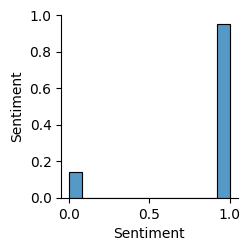

In [66]:
sns.pairplot(dataset)
plt.grid(True)
plt.show()

In [67]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [68]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [69]:
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove punctuations
    tokens = [token for token in tokens if token not in string.punctuation]

    # Remove stopwords
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Lemmatize the remaining words
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text

# Apply preprocessing to the 'review' column and create a new column 'processed_review'
dataset['processed_review'] = dataset['Review'].apply(preprocess_text)

# Display the updated table
print(dataset.head())

                                              Review  Sentiment  \
0                                      Love my Echo!          1   
1                                          Loved it!          1   
2  Sometimes while playing a game, you can answer...          1   
3  I have had a lot of fun with this thing. My 4 ...          1   
4                                              Music          1   

                                    processed_review  
0                                          Love Echo  
1                                              Loved  
2  Sometimes playing game answer question correct...  
3  lot fun thing 4 yr old learns dinosaur control...  
4                                              Music  


<ipython-input-69-0a2230da7ecf>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['processed_review'] = dataset['Review'].apply(preprocess_text)


In [70]:
dataset.head(10)

,Review,Sentiment,processed_review
0,Love my Echo!,1,Love Echo
1,Loved it!,1,Loved
2,"Sometimes while playing a game, you can answer...",1,Sometimes playing game answer question correct...
3,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing 4 yr old learns dinosaur control...
4,Music,1,Music
5,I received the echo as a gift. I needed anothe...,1,received echo gift needed another Bluetooth so...
6,"Without having a cellphone, I cannot use many ...",0,Without cellphone use many feature iPad see us...
7,I think this is the 5th one I've purchased. I'...,1,think 5th one 've purchased 'm working getting...
8,looks great,1,look great
9,Love it! I’ve listened to songs I haven’t hear...,1,Love ’ listened song ’ heard since childhood g...


In [71]:
original_dataset=dataset

In [72]:
dataset.drop('Review', axis=1, inplace=True)

<ipython-input-72-42c14941a7c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop('Review', axis=1, inplace=True)


In [73]:
dataset.head(10)

,Sentiment,processed_review
0,1,Love Echo
1,1,Loved
2,1,Sometimes playing game answer question correct...
3,1,lot fun thing 4 yr old learns dinosaur control...
4,1,Music
5,1,received echo gift needed another Bluetooth so...
6,0,Without cellphone use many feature iPad see us...
7,1,think 5th one 've purchased 'm working getting...
8,1,look great
9,1,Love ’ listened song ’ heard since childhood g...


# IP & OP Separation

In [74]:
ip=dataset['processed_review']
op=dataset['Sentiment']

In [75]:
ip

0                                               Love Echo
1                                                   Loved
2       Sometimes playing game answer question correct...
3       lot fun thing 4 yr old learns dinosaur control...
4                                                   Music
                              ...                        
3145                           Perfect kid adult everyone
3146    Listening music searching location checking ti...
3147    love thing running entire home TV light thermo...
3148    complaint sound quality n't great mostly use c...
3149                                                 Good
Name: processed_review, Length: 3150, dtype: object

In [76]:
op

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: Sentiment, Length: 3150, dtype: int64

# Dataset Spliting

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ip,op,test_size=0.1,stratify = dataset.Sentiment, random_state = 0)

In [78]:
x_train

2011    love Alexa make fun people around seeing first...
3101    additional alexa based device make access bett...
410                                        love work well
1904         better sound echo dot Simple set le 5 minute
1670    Love Echo Show listen music get recipe much hi...
                              ...                        
1227                product turn randomly sometimes night
2841         like ’ helful certain thong supported amazon
295     Easy use great sound ... great purchase great ...
3072    love option u play music everywhere house mult...
1536                    Love l. plan getting echo kitchen
Name: processed_review, Length: 2835, dtype: object

In [79]:
x_test

3125    product easy use entertaining yet hook TV ligh...
1616    echo got 2 show 1 Daughter Absolutely love Esp...
2261                                                 good
1398    love product disappointed realized longer play...
1494    Pleased Echo loud hear voice understand much b...
                              ...                        
2091    great tool toy room-filling music convenient u...
747     Works ’ expect Also good sound quality conside...
1912    love echo plus use Spotify account find phone ...
2354                       Easy hook Wish knew capability
2171    selection wonderful ease use home page nice wi...
Name: processed_review, Length: 315, dtype: object

In [80]:
y_train

2011    1
3101    1
410     1
1904    1
1670    1
       ..
1227    0
2841    1
295     1
3072    1
1536    1
Name: Sentiment, Length: 2835, dtype: int64

In [81]:
y_test

3125    1
1616    1
2261    1
1398    0
1494    1
       ..
2091    1
747     1
1912    1
2354    1
2171    1
Name: Sentiment, Length: 315, dtype: int64

In [82]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2835,), (2835,), (315,), (315,))

# NLP Model Building

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [84]:
model1 = Pipeline([('vector',TfidfVectorizer()), ('tfidf',TfidfTransformer()),('alg',MultinomialNB())])
model2=Pipeline([('vector',TfidfVectorizer()), ('tfidf',TfidfTransformer()),('clf',LinearSVC())])

# Fit the data in to the models

For model1

In [85]:
model1.fit(x_train, y_train)

Pipeline(steps=[('vector', TfidfVectorizer()), ('tfidf', TfidfTransformer()),
                ('alg', MultinomialNB())])

Let's check the model performance

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
y_pred1=model1.predict(x_test)

In [88]:
print("Accuracy is:- ", accuracy_score(y_test, y_pred1)*100)

Accuracy is:-  87.3015873015873


In [89]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred1)

In [90]:
cm

array([[  1,  40],
       [  0, 274]])

In [91]:
cmd=ConfusionMatrixDisplay(cm)

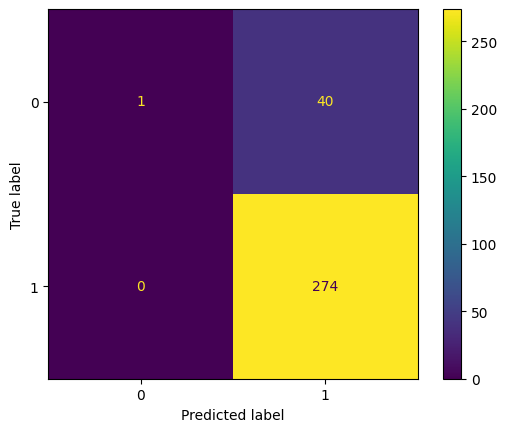

In [92]:
cmd.plot()
plt.show()

For model2

In [93]:
model2.fit(x_train, y_train)

Pipeline(steps=[('vector', TfidfVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC())])

Let's check the model performance

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
y_pred2=model2.predict(x_test)

In [96]:
print("Accuracy is:- ", accuracy_score(y_test, y_pred2)*100)

Accuracy is:-  93.65079365079364


In [97]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred2)

In [98]:
cm

array([[ 25,  16],
       [  4, 270]])

In [99]:
cmd=ConfusionMatrixDisplay(cm)

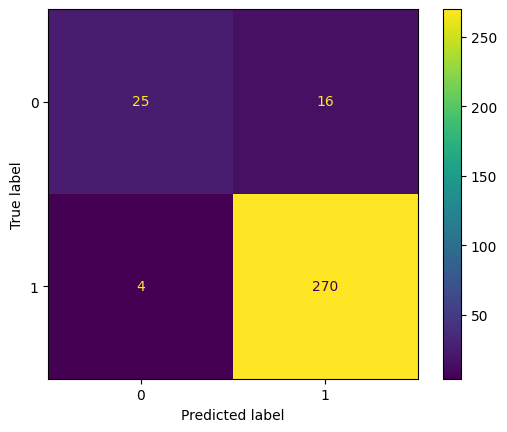

In [100]:
cmd.plot()
plt.show()

So between the two model we got better accuracy in the second one, so lets use the model to predict our output

# Let's Predict

For model1(Naive Bayes)

In [101]:
while True:
  r= input("Enter your review for the prediction (Type 'STOP' to exit):- ")

  if r == 'STOP':
    print("Thank you for using my model",'\n','See you soon')
    break
  else:
    pre=model1.predict([r])

  if pre==1:
    re='Positive'
    print('Positive')
  else:
    re='Negative'
    print('Negative')

Enter your review for the prediction (Type 'STOP' to exit):- Goog product
Positive
Enter your review for the prediction (Type 'STOP' to exit):- Good scound
Positive
Enter your review for the prediction (Type 'STOP' to exit):- bad one
Positive
Enter your review for the prediction (Type 'STOP' to exit):- Bad product
Positive
Enter your review for the prediction (Type 'STOP' to exit):- bad
Positive
Enter your review for the prediction (Type 'STOP' to exit):- STOP
Thank you for using my model 
 See you soon


Formodel2

In [102]:
while True:
  r= input("Enter your review for the prediction (Type 'STOP' to exit):- ")

  if r == 'STOP':
    print("Thank you for using my model",'\n','See you soon')
    break
  else:
    pre=model2.predict([r])

  if pre==1:
    re='Positive'
    print('Positive')
  else:
    re='Negative'
    print('Negative')

Enter your review for the prediction (Type 'STOP' to exit):- Good one
Positive
Enter your review for the prediction (Type 'STOP' to exit):- Bad one
Negative
Enter your review for the prediction (Type 'STOP' to exit):- Bad product
Negative
Enter your review for the prediction (Type 'STOP' to exit):- good scound
Positive
Enter your review for the prediction (Type 'STOP' to exit):- STOP
Thank you for using my model 
 See you soon
